<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Detecting_Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Details About the Data Set

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals.

The original study published the feature extraction methods for general voice disorders.

Number of Instances: 195

Area: Life

Attribute Characteristics: Real

Number of Attributes: 23

Date Donated: 2008-06-26

Associated Tasks: Classification

Missing Values? N/A

File Size: 39.7 KB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('/content/drive/MyDrive/parkinsons.data')

In [3]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


Attribute Information:

Matrix column entries (attributes):

name - ASCII subject name and recording number

*MDVP:Fo(Hz) *- Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

*NHR,HNR *- Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

Please refer to the below link for more details on Computing the fundamental frequency variation spectrum in conversational spoken dialog system.

http://www.cs.cmu.edu/~kornel/pubs/003228.pdf

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
print(df['status'].tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
for c in df.columns:
  print('********************', c,'**********************')
  print()
  print(set(df[c].tolist()))
  print()

******************** name **********************

{'phon_R01_S16_3', 'phon_R01_S34_2', 'phon_R01_S24_5', 'phon_R01_S04_4', 'phon_R01_S37_6', 'phon_R01_S21_7', 'phon_R01_S44_6', 'phon_R01_S50_3', 'phon_R01_S31_5', 'phon_R01_S44_2', 'phon_R01_S21_2', 'phon_R01_S44_3', 'phon_R01_S18_1', 'phon_R01_S17_1', 'phon_R01_S01_5', 'phon_R01_S06_1', 'phon_R01_S18_4', 'phon_R01_S16_6', 'phon_R01_S42_2', 'phon_R01_S50_6', 'phon_R01_S27_6', 'phon_R01_S01_2', 'phon_R01_S19_2', 'phon_R01_S39_2', 'phon_R01_S07_6', 'phon_R01_S07_3', 'phon_R01_S07_2', 'phon_R01_S08_3', 'phon_R01_S16_1', 'phon_R01_S20_2', 'phon_R01_S34_5', 'phon_R01_S05_1', 'phon_R01_S27_3', 'phon_R01_S42_4', 'phon_R01_S24_1', 'phon_R01_S16_5', 'phon_R01_S49_5', 'phon_R01_S13_6', 'phon_R01_S21_3', 'phon_R01_S13_5', 'phon_R01_S01_4', 'phon_R01_S27_4', 'phon_R01_S43_2', 'phon_R01_S18_6', 'phon_R01_S19_4', 'phon_R01_S34_1', 'phon_R01_S06_2', 'phon_R01_S10_4', 'phon_R01_S25_4', 'phon_R01_S05_6', 'phon_R01_S31_2', 'phon_R01_S37_4', 'phon_R01_S18

In [8]:
status = df['status'].value_counts()
status

1    147
0     48
Name: status, dtype: int64

In [9]:
label_df = pd.DataFrame({'status':status.index, 'values':status.values})
label_df

,status,values
0,1,147
1,0,48


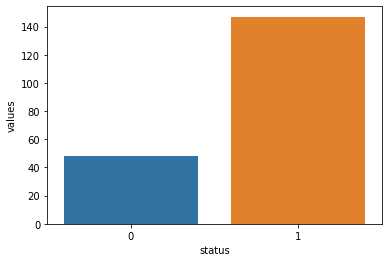

In [10]:
sns.barplot(x='status', y = 'values', data=label_df)

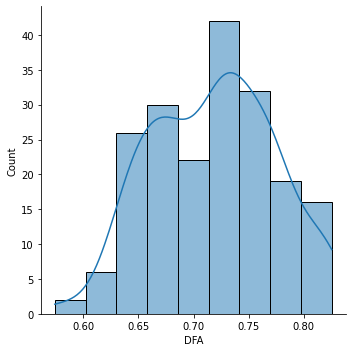

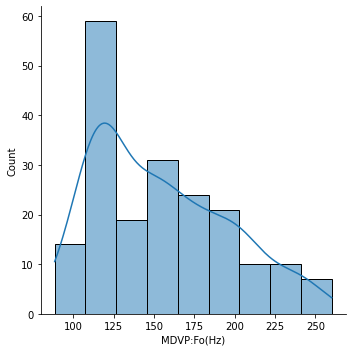

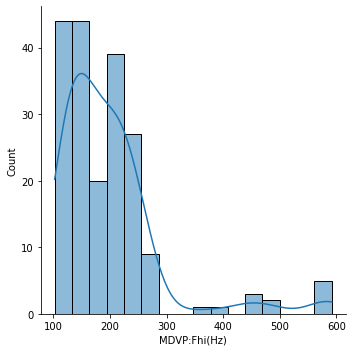

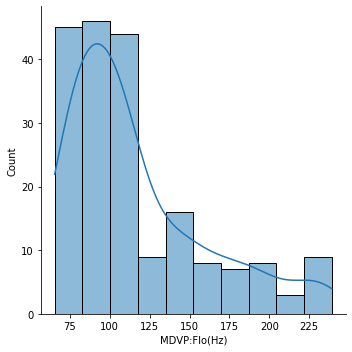

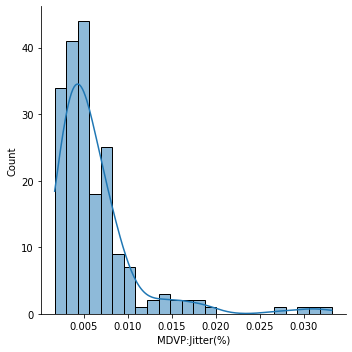

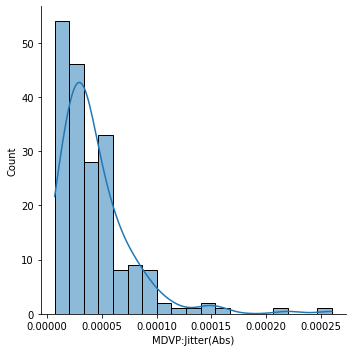

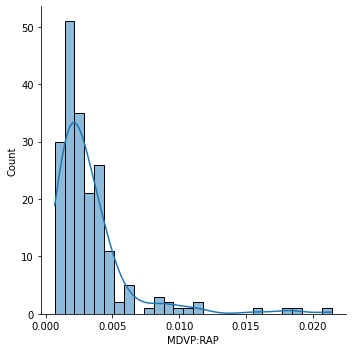

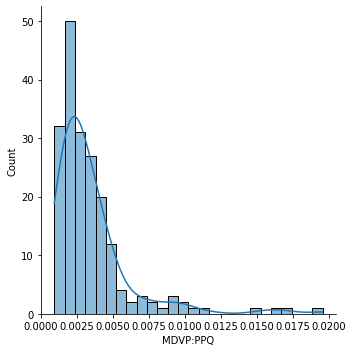

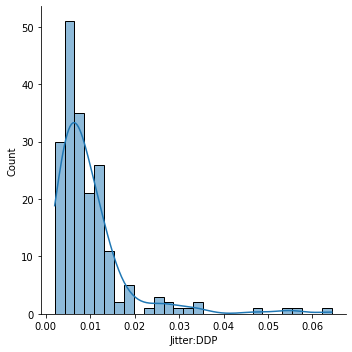

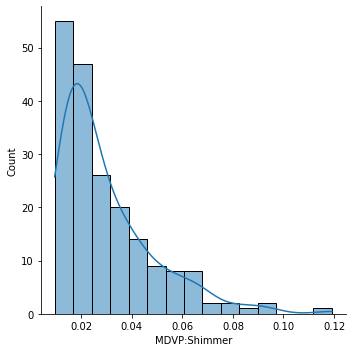

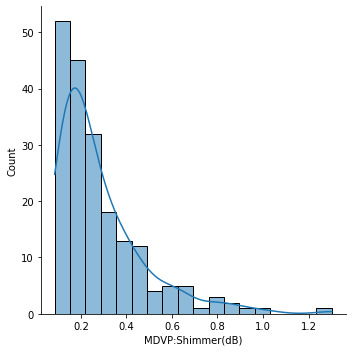

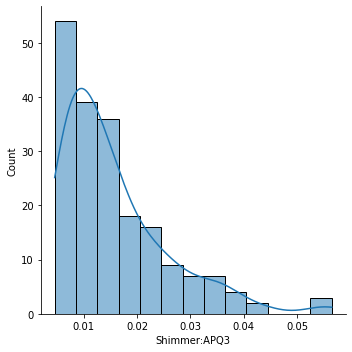

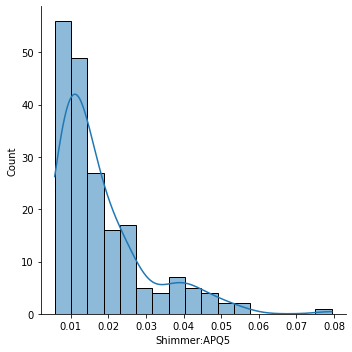

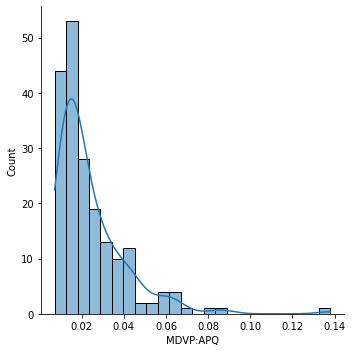

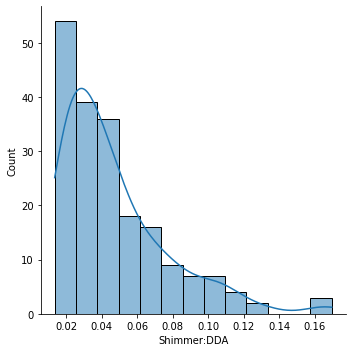

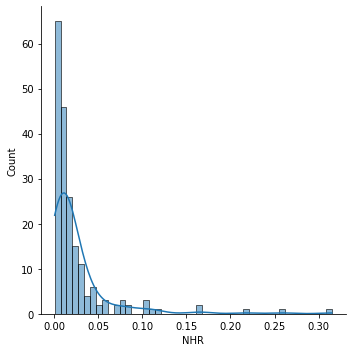

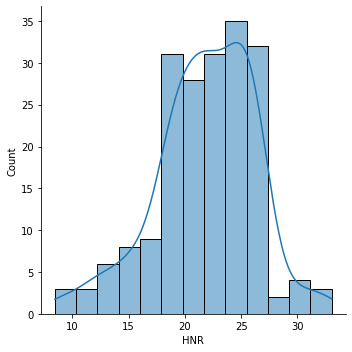

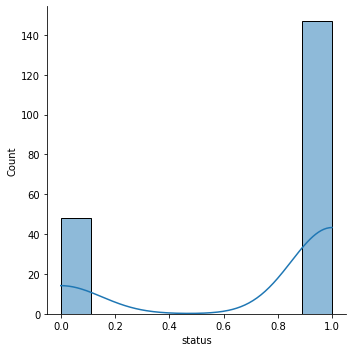

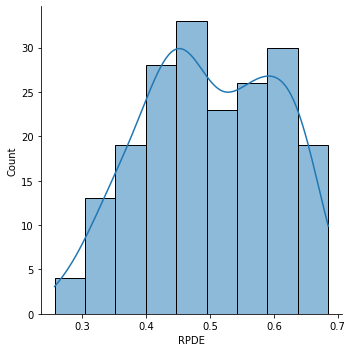

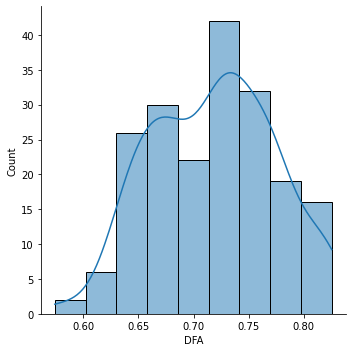

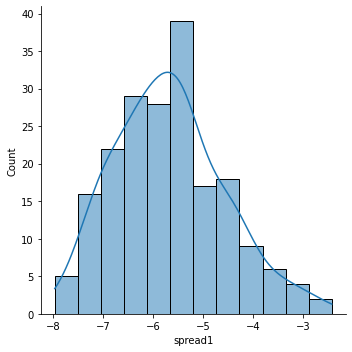

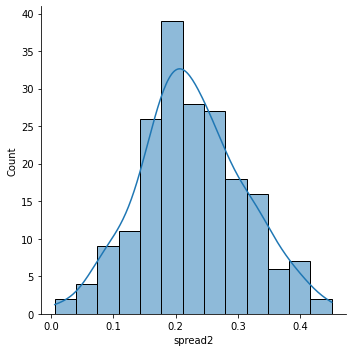

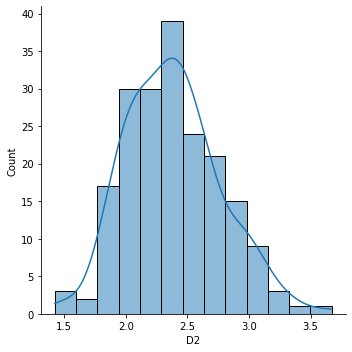

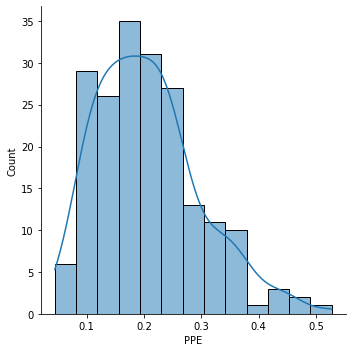

In [11]:
sns.displot(data=df['DFA'], kde=True)

def displot (c):
  sns.displot(data=df[c], kde=True)
  plt.show()


for i in df.columns[1:]:
  displot(i)

In [ ]:
df.select_dtypes(exclude=["object"])

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


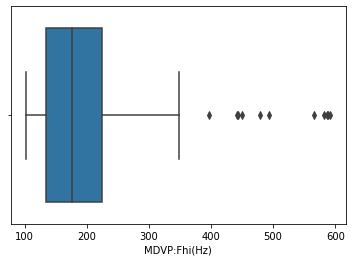

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


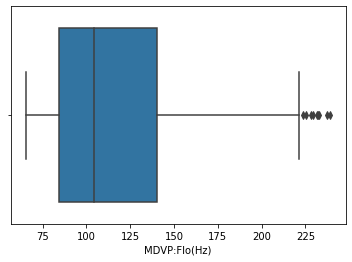

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


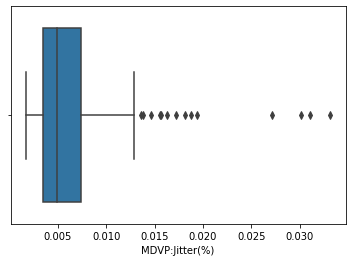

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


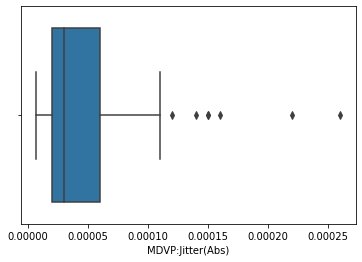

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


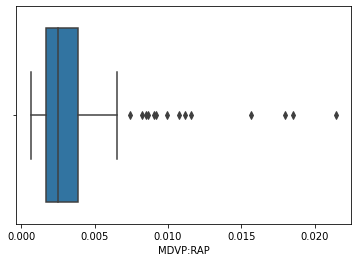

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


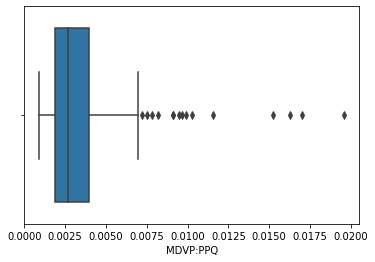

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


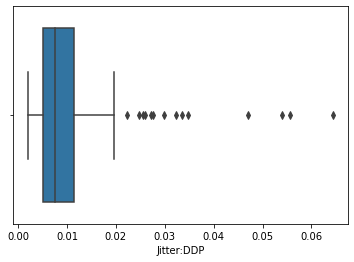

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


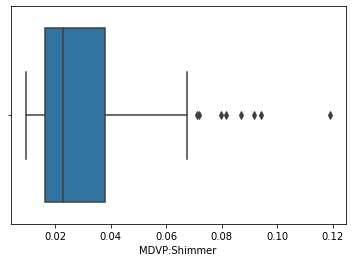

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


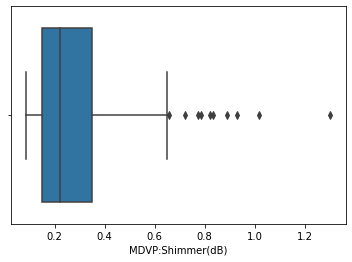

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


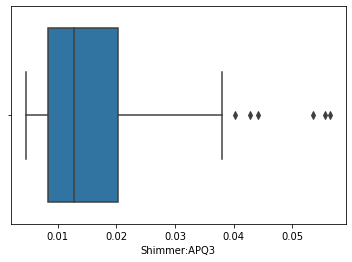

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


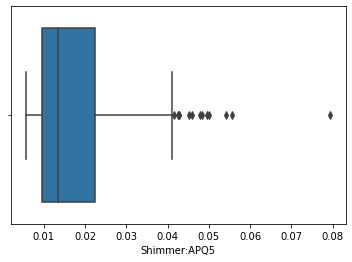

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


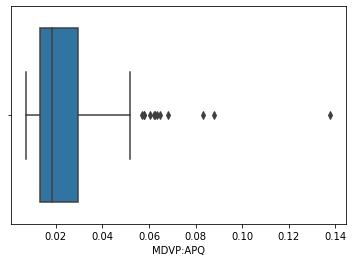

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


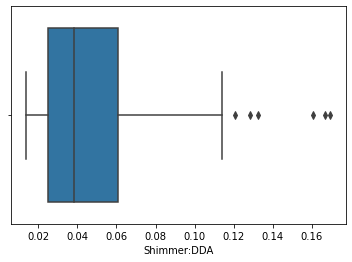

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


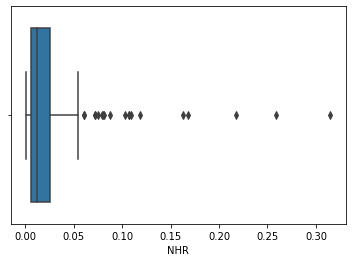

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


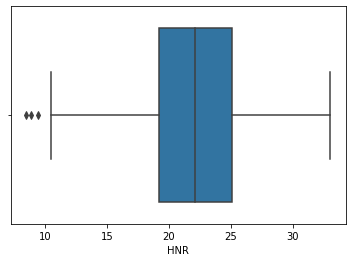

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


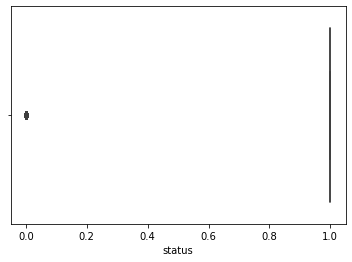

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


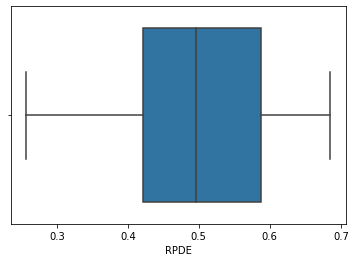

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


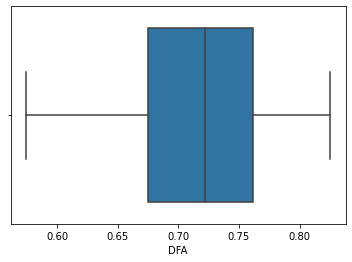

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


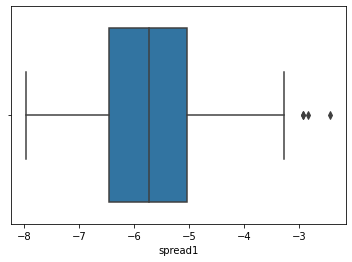

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


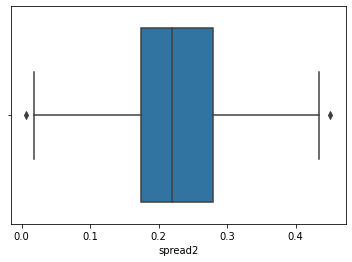

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


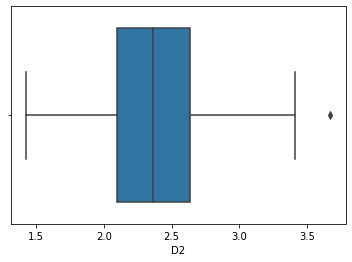

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


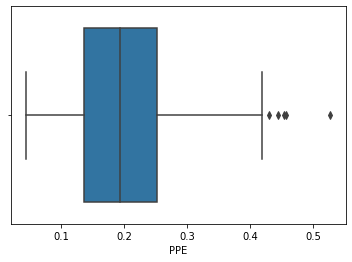

In [12]:
def boxplot (c):
  sns.boxplot(df[c])
  plt.show()
  
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplot(i)

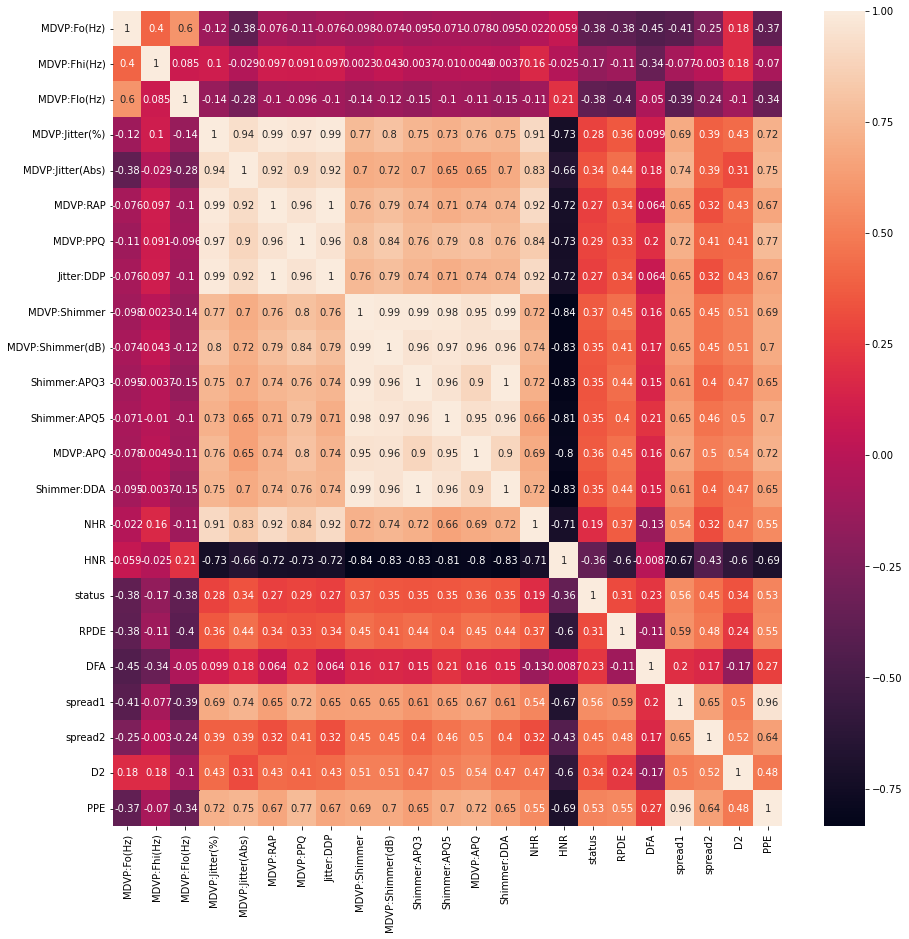

In [13]:
plt.figure (figsize = (15,15))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [14]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [15]:
x = df.drop(['name', 'status'], axis = 1)
y = df['status']

In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({1: 147, 0: 48})


In [17]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x,y)

In [18]:
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(X_ros)
y = y_ros


In [20]:
from sklearn.decomposition import PCA

pca = PCA (0.95)
X_PCA = pca.fit_transform (x)

print(x.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report


list_met = []
list_accuracy = []


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred)

from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier (random_state=14)
dt = classifier2.fit (x_train, y_train)
y_pred2 = classifier2.predict (x_test)

accuracy_DT = accuracy_score (y_test, y_pred2)

from sklearn.ensemble import RandomForestClassifier

classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit (x_train, y_train)
y_pred3 = classifier3.predict(x_test)

accuracy_RFI = accuracy_score(y_test, y_pred3)

from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier (criterion = "entropy")
rfe = classifier4.fit(x_train, y_train)
y_pred4 = classifier4.predict (x_test)

accuracy_RFE = accuracy_score (y_test, y_pred4)

from sklearn.svm import SVC
model_svm = SVC (cache_size=100)
svm = model_svm.fit(x_train, y_train)
y_pred5 = model_svm.predict(x_test)

accuracy_svc = accuracy_score(y_test, y_pred5)

from sklearn.neighbors import KNeighborsClassifier
model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn = model_knn3.fit(x_train, y_train)
pred_knn3 = model_knn3.predict(x_test)

accuracy_KNN = accuracy_score(y_test, pred_knn3)


from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators=[('lr', lr), ('rfi', rfi), ('rfe', rfe), ('DT', dt), ('svm', svm), ('knn', knn)], voting='hard',
                       flatten_transform = True)
model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'RandomForestClassifier(entropy)', 'SVM', 'KNN',' Voting'] 

list2 = [accuracy_LR, accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_svc, accuracy_KNN,accuracy_evc ]
list3 = [classifier,classifier2,classifier3,classifier4,model_svm, model_knn3]

df_Accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
print(df_Accuracy)



                       Method Used  Accuracy
0               LogisticRegression  0.813559
1           DecisionTreeClassifier  0.983051
2           RandomForestClassifier  1.000000
3  RandomForestClassifier(entropy)  1.000000
4                              SVM  0.915254
5                              KNN  0.949153
6                           Voting  0.983051


AxesSubplot(0.125,0.125;0.775x0.755)


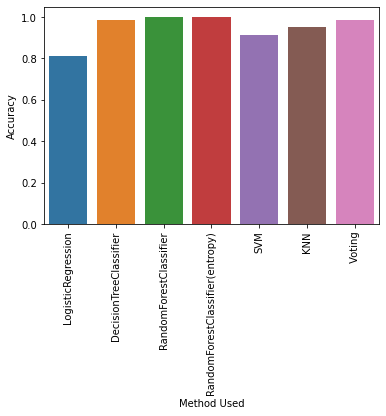

In [26]:
chart = sns.barplot(x='Method Used', y ='Accuracy', data = df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
print(chart)

In [27]:
from xgboost import XGBClassifier

In [28]:
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)

XGBClassifier()

In [29]:
y_pred = model_xg.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9830508474576272


In [33]:
for i in list3:
  print('*********************************', i   ,'**************************************')
  print()
  print(classification_report(y_test, i.predict(x_test)))
  print('Confusion Matrix:')

********************************* LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') **************************************

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        24
           1       0.90      0.77      0.83        35

    accuracy                           0.81        59
   macro avg       0.81      0.82      0.81        59
weighted avg       0.83      0.81      0.82        59

Confusion Matrix:
********************************* DecisionTreeClassifier(random_state=14) **************************************

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        35

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

Confusion Matrix:
********************************* RandomForestClassifier(rand

In [34]:
# Visualizing performance with ROC

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


------------------ROC FOR  LogisticRegression  + PCA ---------------------------


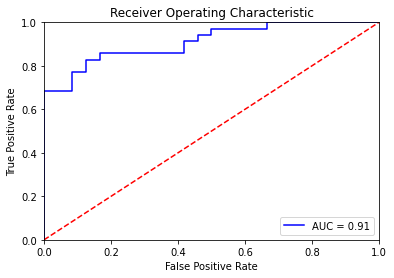



------------------ROC FOR  DecisionTreeClassifier  + PCA ---------------------------


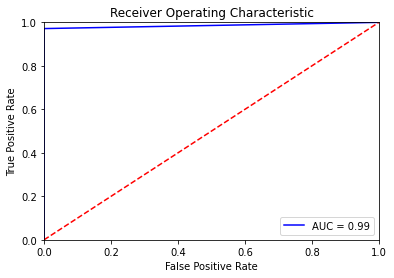



------------------ROC FOR  RandomForestClassifier  + PCA ---------------------------


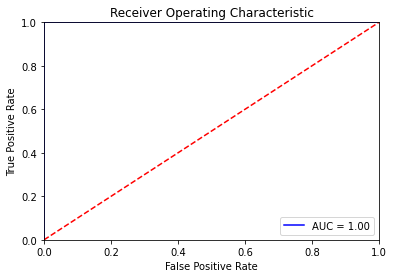



------------------ROC FOR  RandomForestClassifier(entropy)  + PCA ---------------------------


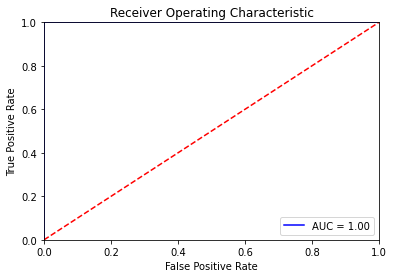



------------------ROC FOR  SVM  + PCA ---------------------------
roc not valid

------------------ROC FOR  KNN  + PCA ---------------------------


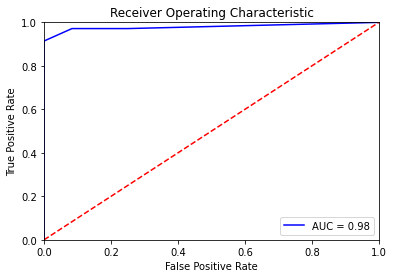

In [35]:
for i in range(0,len(list3)):
    try:
        print()
        print("------------------ROC FOR ",list1[i]," + PCA ---------------------------")
        plot_roc(list3[i], x_test, np.array(y_test))
        print()
    except:
        print("roc not valid")